In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [16]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### Область работы 2 (выполнение лучшей модели)

In [17]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [18]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

In [19]:
# Блок(и) обучения и поверки модели

In [20]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [21]:
df_train['quality'] = df_train.quality.apply(lambda x: 1 if x>=7 else 0)
#df_train.head()

In [22]:
#Удаление выбросов
set_index_for_drop = set()
for column in df_train.columns[:-1]:
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    indexes = list(df_train[(df_train[column] < Q1-1.5*IQR ) | (df_train[column] > Q3+1.5*IQR)].index)
    set_index_for_drop.update(indexes)

df_not_outliers = df_train.drop(index=set_index_for_drop).copy()

In [23]:
#Разделяем на X и y
X, y = df_not_outliers.drop(columns='quality'), df_not_outliers['quality']

In [24]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

param_grid =[
    {'preprocessing': [ MinMaxScaler()],
     'clf__penalty': ['elasticnet'], 
     'clf__solver': ['saga'], 
    'clf__C':[0.025], 
    'clf__class_weight': [None],  
     'clf__max_iter': [250],  
     'clf__l1_ratio': [0.8],   
     'clf__multi_class': ['multinomial']  
    }]


grid = GridSearchCV(pipe, param_grid, scoring='precision', return_train_score = True)
grid.fit(X, y)  # т.к. модель уже подобрана обучаемся в конце всегда на всем наборе имеющихся у нас данных
#grid    

GridSearchCV(estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__C': [0.025], 'clf__class_weight': [None],
                          'clf__l1_ratio': [0.8], 'clf__max_iter': [250],
                          'clf__multi_class': ['multinomial'],
                          'clf__penalty': ['elasticnet'],
                          'clf__solver': ['saga'],
                          'preprocessing': [MinMaxScaler()]}],
             return_train_score=True, scoring='precision')

In [25]:
# Блок предсказания с использованием тестового набора

In [26]:
final_pred = grid.predict(df_test)
#final_pred

In [27]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = final_pred

0.7647058823529411

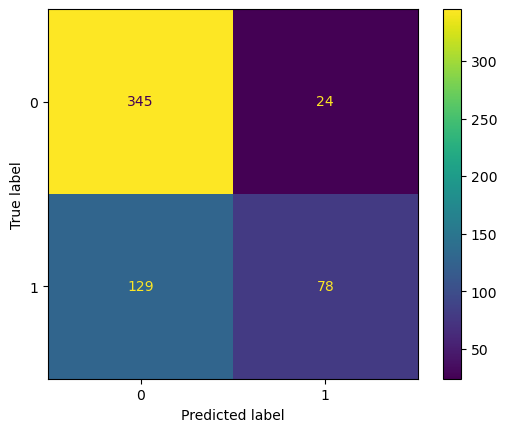

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)

In [32]:
grid

GridSearchCV(estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__C': [0.025], 'clf__class_weight': [None],
                          'clf__l1_ratio': [0.8], 'clf__max_iter': [250],
                          'clf__multi_class': ['multinomial'],
                          'clf__penalty': ['elasticnet'],
                          'clf__solver': ['saga'],
                          'preprocessing': [MinMaxScaler()]}],
             return_train_score=True, scoring='precision')